## USERS DATA: FROM API TO EXPLORATORY DATA ANALYSIS

In [96]:
#Importing pandas library to fetch and handle json data
import pandas as pd
#importing seaborn a sns
import seaborn as sns
#importing pyplpt from matplotlib as plt
import matplotlib.pyplot as plt

### Fetching and handling data from API

In [97]:
# Initial parameters
limit = 30
skip = 0
total = None
dataframes = []
print("Fetching data...")
while True:
    # Construct the URL with dynamic limit and skip parameters
    url = f"https://dummyjson.com/users?limit={limit}&skip={skip}"
    
    # Define headers to pretend we are a regular web browser not a bout
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
    
    # Pass the headers via storage_options
    raw_df = pd.read_json(url, storage_options=headers)
    
    # If the dataframe is empty or missing 'users', break to prevent infinite loops
    if raw_df.empty or 'users' not in raw_df.columns:
        break
        
    # Get the total number of records from the first row of the 'total' column
    if total is None:
        total = raw_df['total'].iloc[0]
        
    # Extract the 'users' column (which contains dictionaries) into its own DataFrame
    users_chunk = pd.json_normalize(raw_df['users'].tolist())
    dataframes.append(users_chunk)
    #print number of rows fetched with given skip parameters and total rows
    print(f"Fetched {len(users_chunk)} records. (Skip: {skip}, Total target: {total})")
    
    # Update the skip parameter for the next cycle
    skip += limit
    
    # Check if we have fetched all available data
    if skip >= total:
        break

# Concatenate all fetched segments into one final DataFrame
final_df = pd.concat(dataframes, ignore_index=True)

print("--- Fetching Complete ---")
print(f"Total rows in final DataFrame: {len(final_df)}")


Fetching data...
Fetched 30 records. (Skip: 0, Total target: 208)
Fetched 30 records. (Skip: 30, Total target: 208)
Fetched 30 records. (Skip: 60, Total target: 208)
Fetched 30 records. (Skip: 90, Total target: 208)
Fetched 30 records. (Skip: 120, Total target: 208)
Fetched 30 records. (Skip: 150, Total target: 208)
Fetched 28 records. (Skip: 180, Total target: 208)
--- Fetching Complete ---
Total rows in final DataFrame: 208


### Data Exploration

In [98]:
# Display the final dataframe info
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               208 non-null    int64  
 1   firstName                        208 non-null    str    
 2   lastName                         208 non-null    str    
 3   maidenName                       208 non-null    str    
 4   age                              208 non-null    int64  
 5   gender                           208 non-null    str    
 6   email                            208 non-null    str    
 7   phone                            208 non-null    str    
 8   username                         208 non-null    str    
 9   password                         208 non-null    str    
 10  birthDate                        208 non-null    str    
 11  image                            208 non-null    str    
 12  bloodGroup                       

In [99]:

# Shape of the DataFrame
print("DataFrame Shape (rows, columns):")
final_df.shape

DataFrame Shape (rows, columns):


(208, 52)

In [100]:

# List of all columns count, names
cols = final_df.columns.tolist()
print("Number of columns: ")
print(len(cols))
print("Column Names:")
print(cols)


Number of columns: 
52
Column Names:
['id', 'firstName', 'lastName', 'maidenName', 'age', 'gender', 'email', 'phone', 'username', 'password', 'birthDate', 'image', 'bloodGroup', 'height', 'weight', 'eyeColor', 'ip', 'macAddress', 'university', 'ein', 'ssn', 'userAgent', 'role', 'hair.color', 'hair.type', 'address.address', 'address.city', 'address.state', 'address.stateCode', 'address.postalCode', 'address.coordinates.lat', 'address.coordinates.lng', 'address.country', 'bank.cardExpire', 'bank.cardNumber', 'bank.cardType', 'bank.currency', 'bank.iban', 'company.department', 'company.name', 'company.title', 'company.address.address', 'company.address.city', 'company.address.state', 'company.address.stateCode', 'company.address.postalCode', 'company.address.coordinates.lat', 'company.address.coordinates.lng', 'company.address.country', 'crypto.coin', 'crypto.wallet', 'crypto.network']


In [101]:
# Data types of each column
print("Data Types:")
final_df.dtypes

Data Types:


id                                   int64
firstName                              str
lastName                               str
maidenName                             str
age                                  int64
gender                                 str
email                                  str
phone                                  str
username                               str
password                               str
birthDate                              str
image                                  str
bloodGroup                             str
height                             float64
weight                             float64
eyeColor                               str
ip                                     str
macAddress                             str
university                             str
ein                                    str
ssn                                    str
userAgent                              str
role                                   str
hair.color 

In [102]:
# Number of missing values per column
print("Missing Values per Column:")
# Filtering to only show columns that actually have missing values for cleaner output :)
missing_vals = final_df.isnull().sum()
print(missing_vals[missing_vals > 0])

Missing Values per Column:
Series([], dtype: int64)


In [103]:
# Number of duplicate rows
print("Number of Duplicate Rows:")
final_df.duplicated().sum()

Number of Duplicate Rows:


np.int64(0)

In [104]:

# Summary statistics for numeric columns
print("Summary Statistics (Numeric):")
final_df.describe()

Summary Statistics (Numeric):


,id,age,height,weight,address.coordinates.lat,address.coordinates.lng,company.address.coordinates.lat,company.address.coordinates.lng
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,104.500000,33.139423,175.720240,75.038606,-0.357609,-11.729826,2.267603,-2.701298
std,60.188592,5.544269,14.119984,14.090775,53.866250,103.855891,50.015813,99.876659
min,1.000000,23.000000,150.250000,50.100000,-89.077500,-179.958549,-87.103718,-176.705236
25%,52.750000,29.000000,164.187500,62.547500,-52.583475,-101.197683,-40.780079,-83.301244
50%,104.500000,32.000000,177.430000,75.985000,2.925385,-29.607807,7.324804,-6.090248
75%,156.250000,36.000000,186.960000,86.992500,45.281022,71.862635,43.829917,84.288805
max,208.000000,46.000000,199.810000,99.540000,89.781211,179.922909,89.270633,178.804291


In [105]:
# Value counts for important categorical columns
print("Value Counts for Categorical Columns:")
categorical_cols = ['gender', 'bloodGroup', 'role', 'address.country']

for col in categorical_cols:
    # We check if the column exists to avoid errors just in case the API structure changes :)
    if col in final_df.columns:
        print(f"--- {col.upper()} ---") #Some Decorations
        print(final_df[col].value_counts()) #value conuts for this series
    else:
        print(f"Column '{col}' not found in DataFrame.")

Value Counts for Categorical Columns:
--- GENDER ---
gender
female    106
male      102
Name: count, dtype: int64
--- BLOODGROUP ---
bloodGroup
O-     31
B-     31
AB+    29
AB-    29
B+     25
O+     22
A+     21
A-     20
Name: count, dtype: int64
--- ROLE ---
role
user         193
moderator     10
admin          5
Name: count, dtype: int64
--- ADDRESS.COUNTRY ---
address.country
United States    208
Name: count, dtype: int64


### Data Cleaning

In [106]:
# Define the columns we want to check and fill
numeric_cols_to_clean = ['age', 'height', 'weight']

for col in numeric_cols_to_clean:
    if col in final_df.columns:
        # Count of missing values before handling
        missing_before = final_df[col].isnull().sum()
        
        if missing_before > 0:
            # Calculate median
            median_val = final_df[col].median()
            
            # Fill missing values with the median
            final_df[col] = final_df[col].fillna(median_val)
            
            print(f"Filled {missing_before} missing values in '{col}' with median: {median_val}")
        else:
            print(f"No missing values found in '{col}'.")

No missing values found in 'age'.
No missing values found in 'height'.
No missing values found in 'weight'.


In [ ]:
#Making sure important numberic columns have the right datatype
final_df[['age', 'height', 'weight']].dtypes

age         int64
height    float64
weight    float64
dtype: object

### Visualization

#### Number of users for each gender

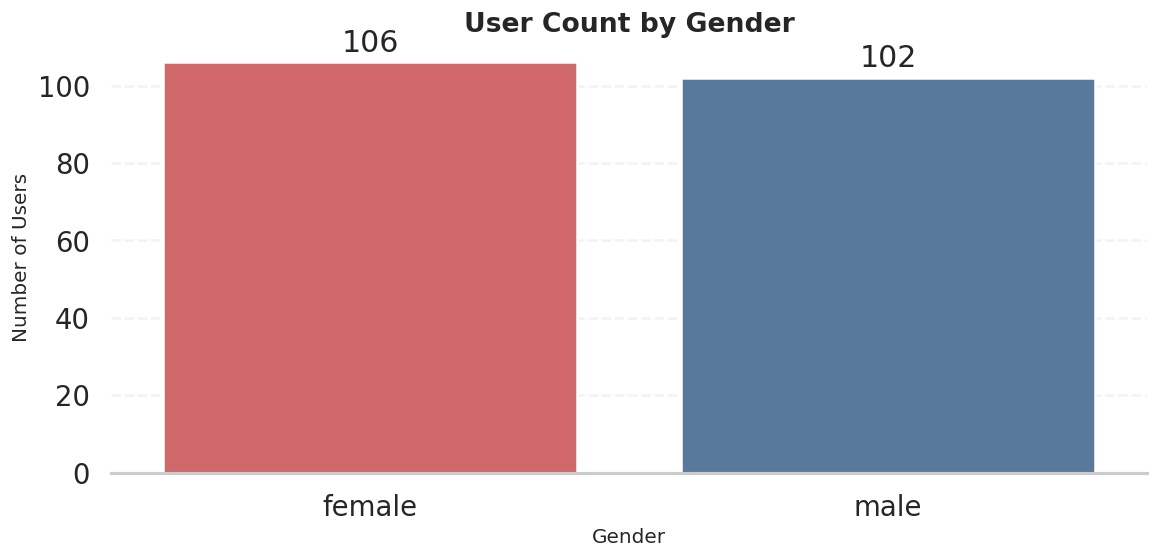

In [110]:
# Number of users in each gender category
fig, ax = plt.subplots()
order = final_df['gender'].value_counts().index
sns.countplot(
    data=final_df,
    x='gender',
    order=order,
    hue='gender',
    palette=gender_palette,
    legend=False,
    ax=ax
)
for container in ax.containers:
    ax.bar_label(container, padding=3)
ax.set_title('User Count by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Users')
sns.despine(left=True)
plt.tight_layout()
plt.show()


#### Blood group distribution


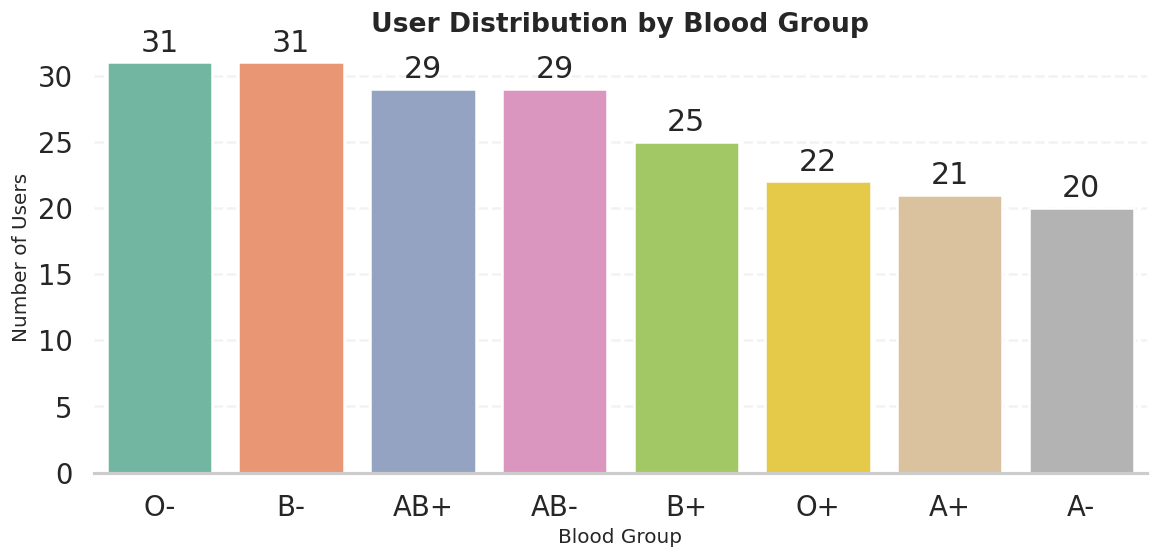

In [115]:
# Distribution of users by blood group
fig, ax = plt.subplots(figsize=(10, 5))
bg_order = final_df['bloodGroup'].value_counts().index
bg_palette = dict(zip(bg_order, sns.color_palette('Set2', n_colors=len(bg_order))))
sns.countplot(
    data=final_df,
    x='bloodGroup',
    order=bg_order,
    hue='bloodGroup',
    palette=bg_palette,
    legend=False,
    ax=ax
)
for container in ax.containers:
    ax.bar_label(container, padding=3)
ax.set_title('User Distribution by Blood Group')
ax.set_xlabel('Blood Group')
ax.set_ylabel('Number of Users')
sns.despine(left=True)
plt.tight_layout()
plt.show()

#### User role distribution


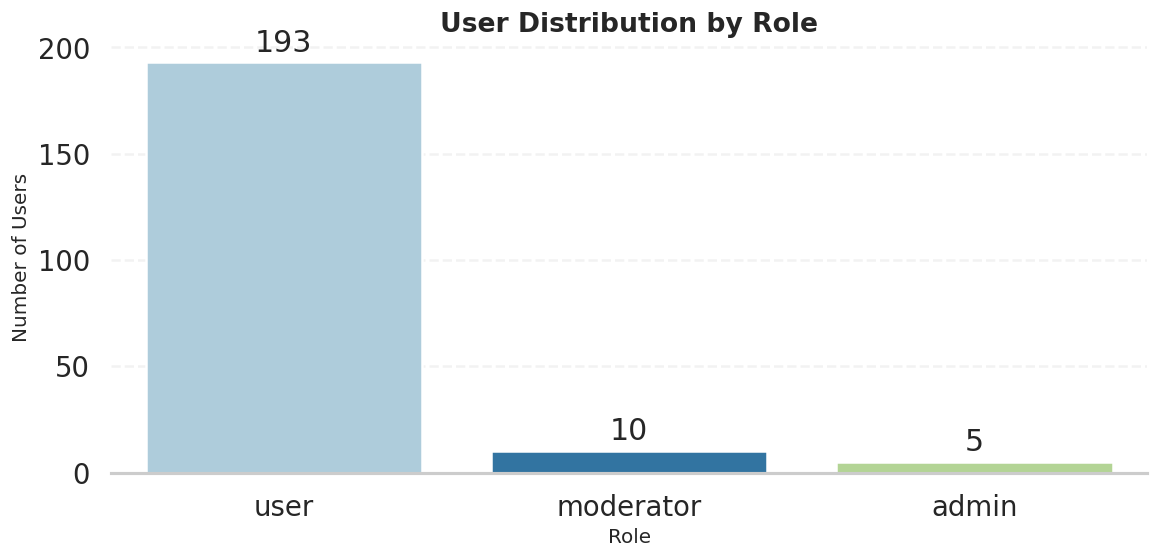

In [116]:
# Distribution of users by role
fig, ax = plt.subplots(figsize=(10, 5))
role_order = final_df['role'].value_counts().index
role_palette = dict(zip(role_order, sns.color_palette('Paired', n_colors=len(role_order))))
sns.countplot(
    data=final_df,
    x='role',
    order=role_order,
    hue='role',
    palette=role_palette,
    legend=False,
    ax=ax
)
for container in ax.containers:
    ax.bar_label(container, padding=3)
ax.set_title('User Distribution by Role')
ax.set_xlabel('Role')
ax.set_ylabel('Number of Users')
sns.despine(left=True)
plt.tight_layout()
plt.show()

#### Top 10 cities with the most users

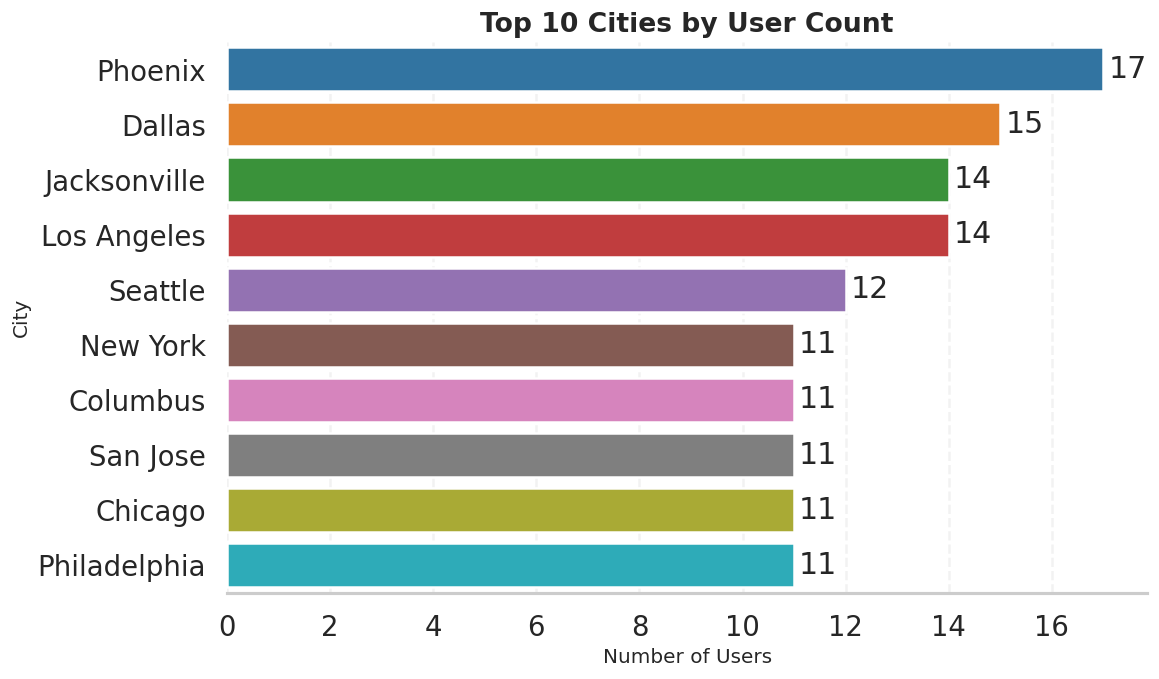

In [111]:
# Top 10 cities with the highest number of users
top_10_cities = final_df['address.city'].value_counts().head(10)
top_10_df = top_10_cities.rename_axis('city').reset_index(name='users')
city_palette = dict(zip(top_10_df['city'], sns.color_palette('tab10', n_colors=len(top_10_df))))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=top_10_df,
    x='users',
    y='city',
    hue='city',
    palette=city_palette,
    dodge=False,
    legend=False,
    ax=ax
)
for container in ax.containers:
    ax.bar_label(container, padding=3)
ax.set_title('Top 10 Cities by User Count')
ax.set_xlabel('Number of Users')
ax.set_ylabel('City')
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()


#### Overall Age Distribution

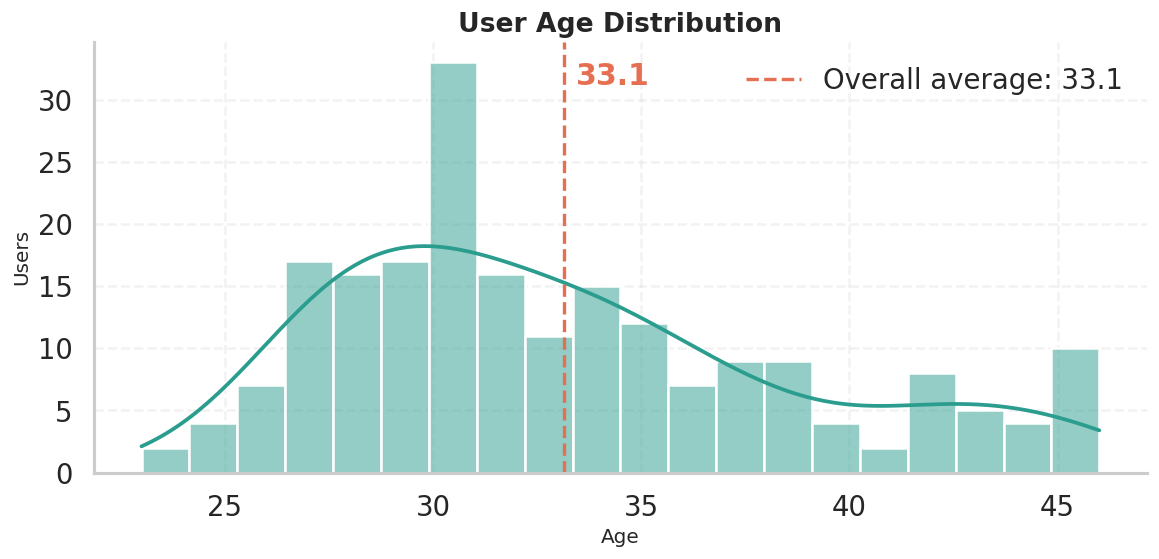

In [108]:
# Shared professional theme for all visualizations
sns.set_theme(style='whitegrid', context='talk')
plt.rcParams.update({
    'figure.figsize': (10, 5),
    'figure.dpi': 120,
    'axes.titlesize': 16,
    'axes.titleweight': 'semibold',
    'axes.labelsize': 12,
    'axes.labelweight': 'medium',
    'grid.alpha': 0.25,
    'grid.linestyle': '--',
    'legend.frameon': False
})

primary = '#2a9d8f'
accent = '#e76f51'

# Consistent category colors for gender across all charts
base_gender_colors = {'male': '#4e79a7', 'female': '#e15759'}
gender_values = final_df['gender'].dropna().unique()
gender_palette = {g: base_gender_colors.get(str(g).strip().lower(), '#59a14f') for g in gender_values}

# Age distribution with overall average marker
avg_age = final_df['age'].mean()
fig, ax = plt.subplots()
sns.histplot(data=final_df, x='age', bins=20, kde=True, color=primary, edgecolor='white', ax=ax)
ax.axvline(avg_age, color=accent, linestyle='--', linewidth=2, label=f'Overall average: {avg_age:.1f}')
ax.text(avg_age + 0.3, ax.get_ylim()[1] * 0.9, f'{avg_age:.1f}', color=accent, fontweight='bold')
ax.set_title('User Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Users')
ax.legend(loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()


#### Age spread by gender


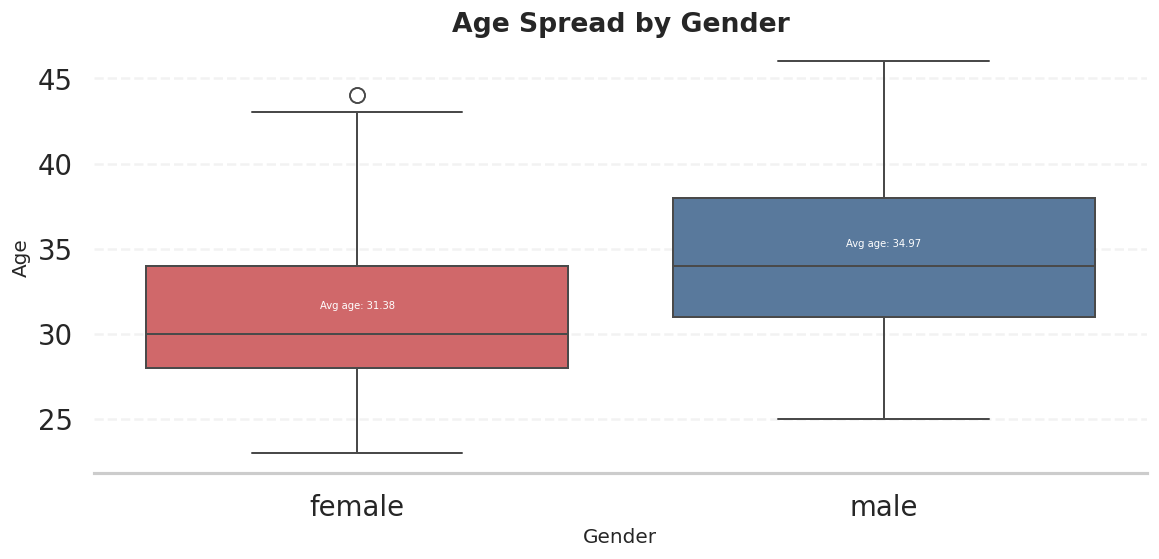

In [128]:
# Boxplot to show age spread and outliers by gender
fig, ax = plt.subplots(figsize=(10, 5))
order = final_df['gender'].value_counts().index

sns.boxplot(
    data=final_df,
    x='gender',
    y='age',
    order=order,
    hue='gender',
    palette=gender_palette,
    dodge=False,
    legend=False,
    linewidth=1.2,
    ax=ax
)

# --- Add mean markers ---
means = final_df.groupby('gender')['age'].mean().reindex(order)

for i, (gender, mean_age) in enumerate(means.items()):
    ax.text(
        i,
        mean_age,
        f"Avg age: {mean_age:.2f}",
        ha='center',
        va='bottom',
        fontsize=6,
        color='white'
    )

ax.set_title('Age Spread by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')

sns.despine(left=True)
plt.tight_layout()
plt.show()

#### Height distribution

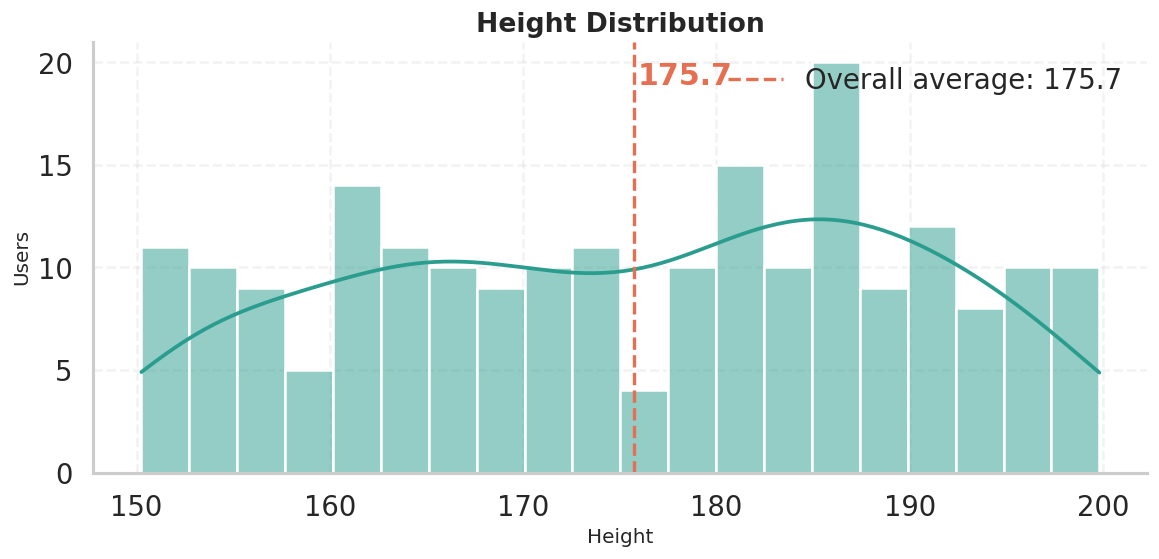

In [113]:
avg_height = final_df['height'].mean()
fig, ax = plt.subplots()
sns.histplot(data=final_df, x='height', bins=20, kde=True, color='#2a9d8f', edgecolor='white', ax=ax)
ax.axvline(avg_height, color='#e76f51', linestyle='--', linewidth=2, label=f'Overall average: {avg_height:.1f}')
ax.text(avg_height + 0.2, ax.get_ylim()[1] * 0.9, f'{avg_height:.1f}', color='#e76f51', fontweight='bold')
ax.set_title('Height Distribution')
ax.set_xlabel('Height')
ax.set_ylabel('Users')
ax.legend(loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()

#### Weight distribution

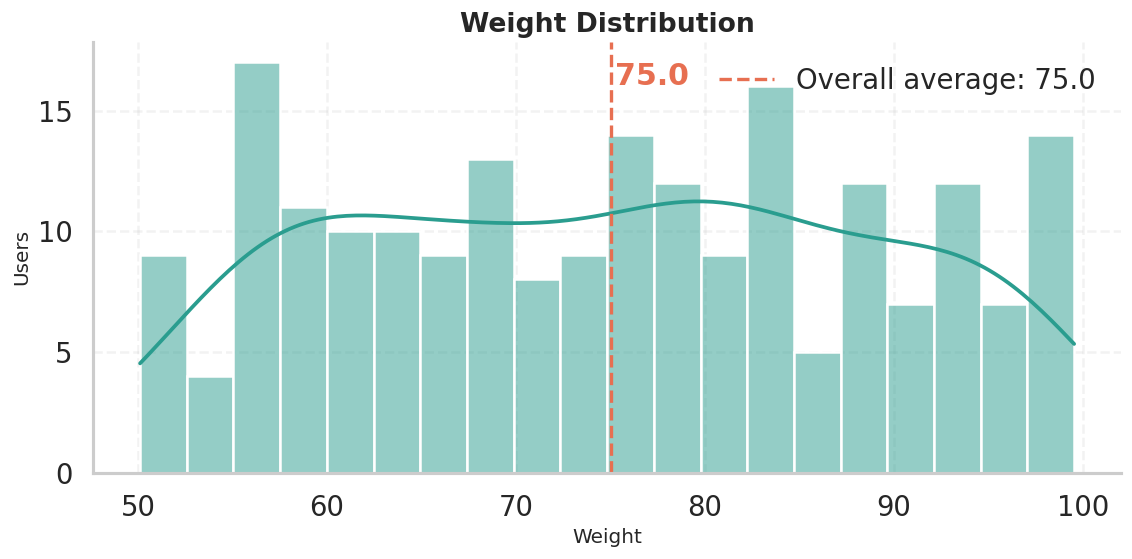

In [112]:
# Weight distribution with overall average marker
avg_weight = final_df['weight'].mean()
fig, ax = plt.subplots()
sns.histplot(data=final_df, x='weight', bins=20, kde=True, color='#2a9d8f', edgecolor='white', ax=ax)
ax.axvline(avg_weight, color='#e76f51', linestyle='--', linewidth=2, label=f'Overall average: {avg_weight:.1f}')
ax.text(avg_weight + 0.2, ax.get_ylim()[1] * 0.9, f'{avg_weight:.1f}', color='#e76f51', fontweight='bold')
ax.set_title('Weight Distribution')
ax.set_xlabel('Weight')
ax.set_ylabel('Users')
ax.legend(loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()


#### Correlation heatmap for numeric features


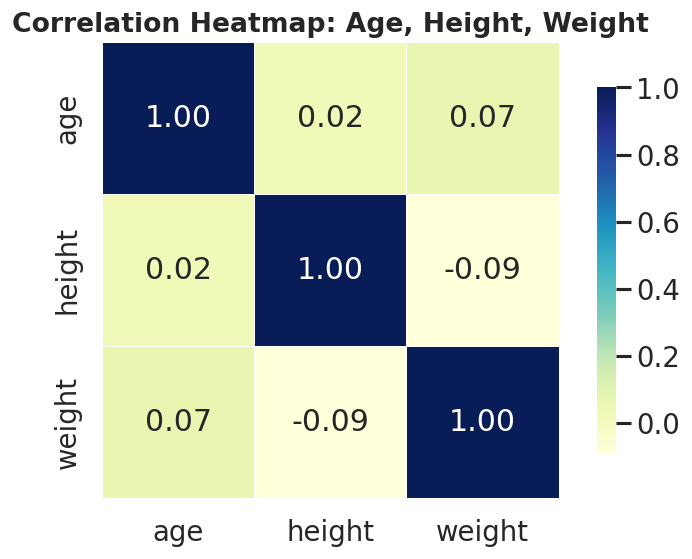

In [117]:
# Correlation between key numeric features
numeric_cols = ['age', 'height', 'weight']
corr = final_df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    ax=ax
)
ax.set_title('Correlation Heatmap: Age, Height, Weight')
plt.tight_layout()
plt.show()

#### Relationship between: Age & Height & Weight

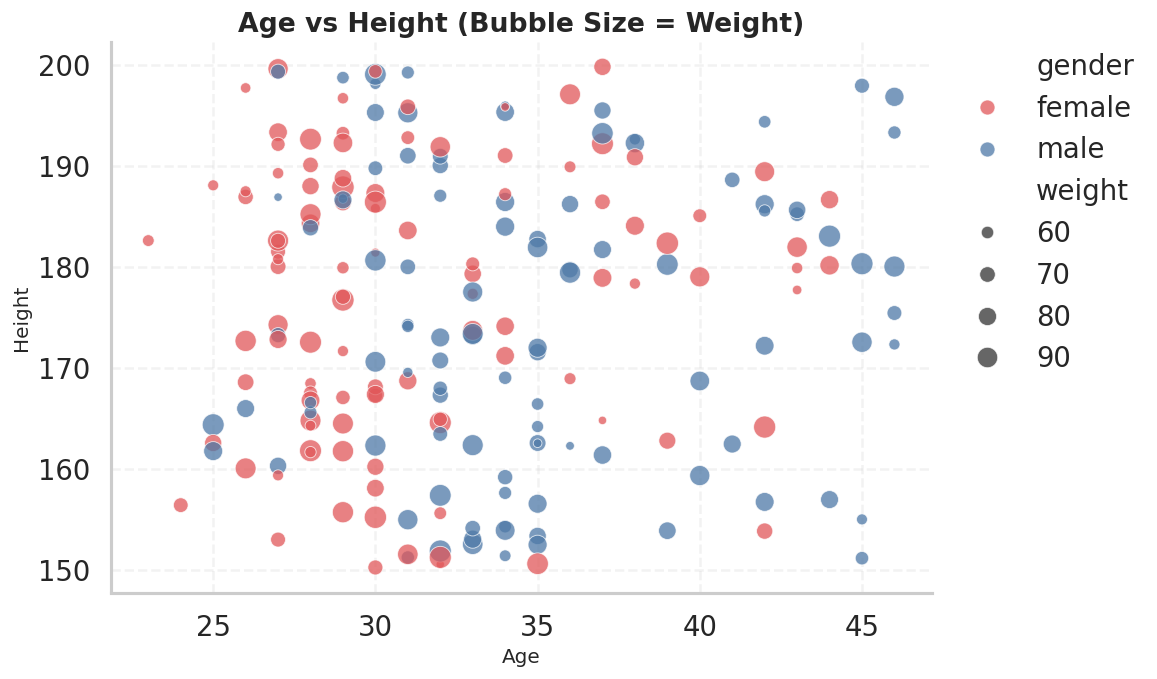

In [114]:
# Relationship between age, height, and weight
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=final_df,
    x='age',
    y='height',
    size='weight',
    hue='gender',
    sizes=(25, 180),
    alpha=0.75,
    palette=gender_palette,
    ax=ax
)
ax.set_title('Age vs Height (Bubble Size = Weight)')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
plt.tight_layout()
plt.show()
